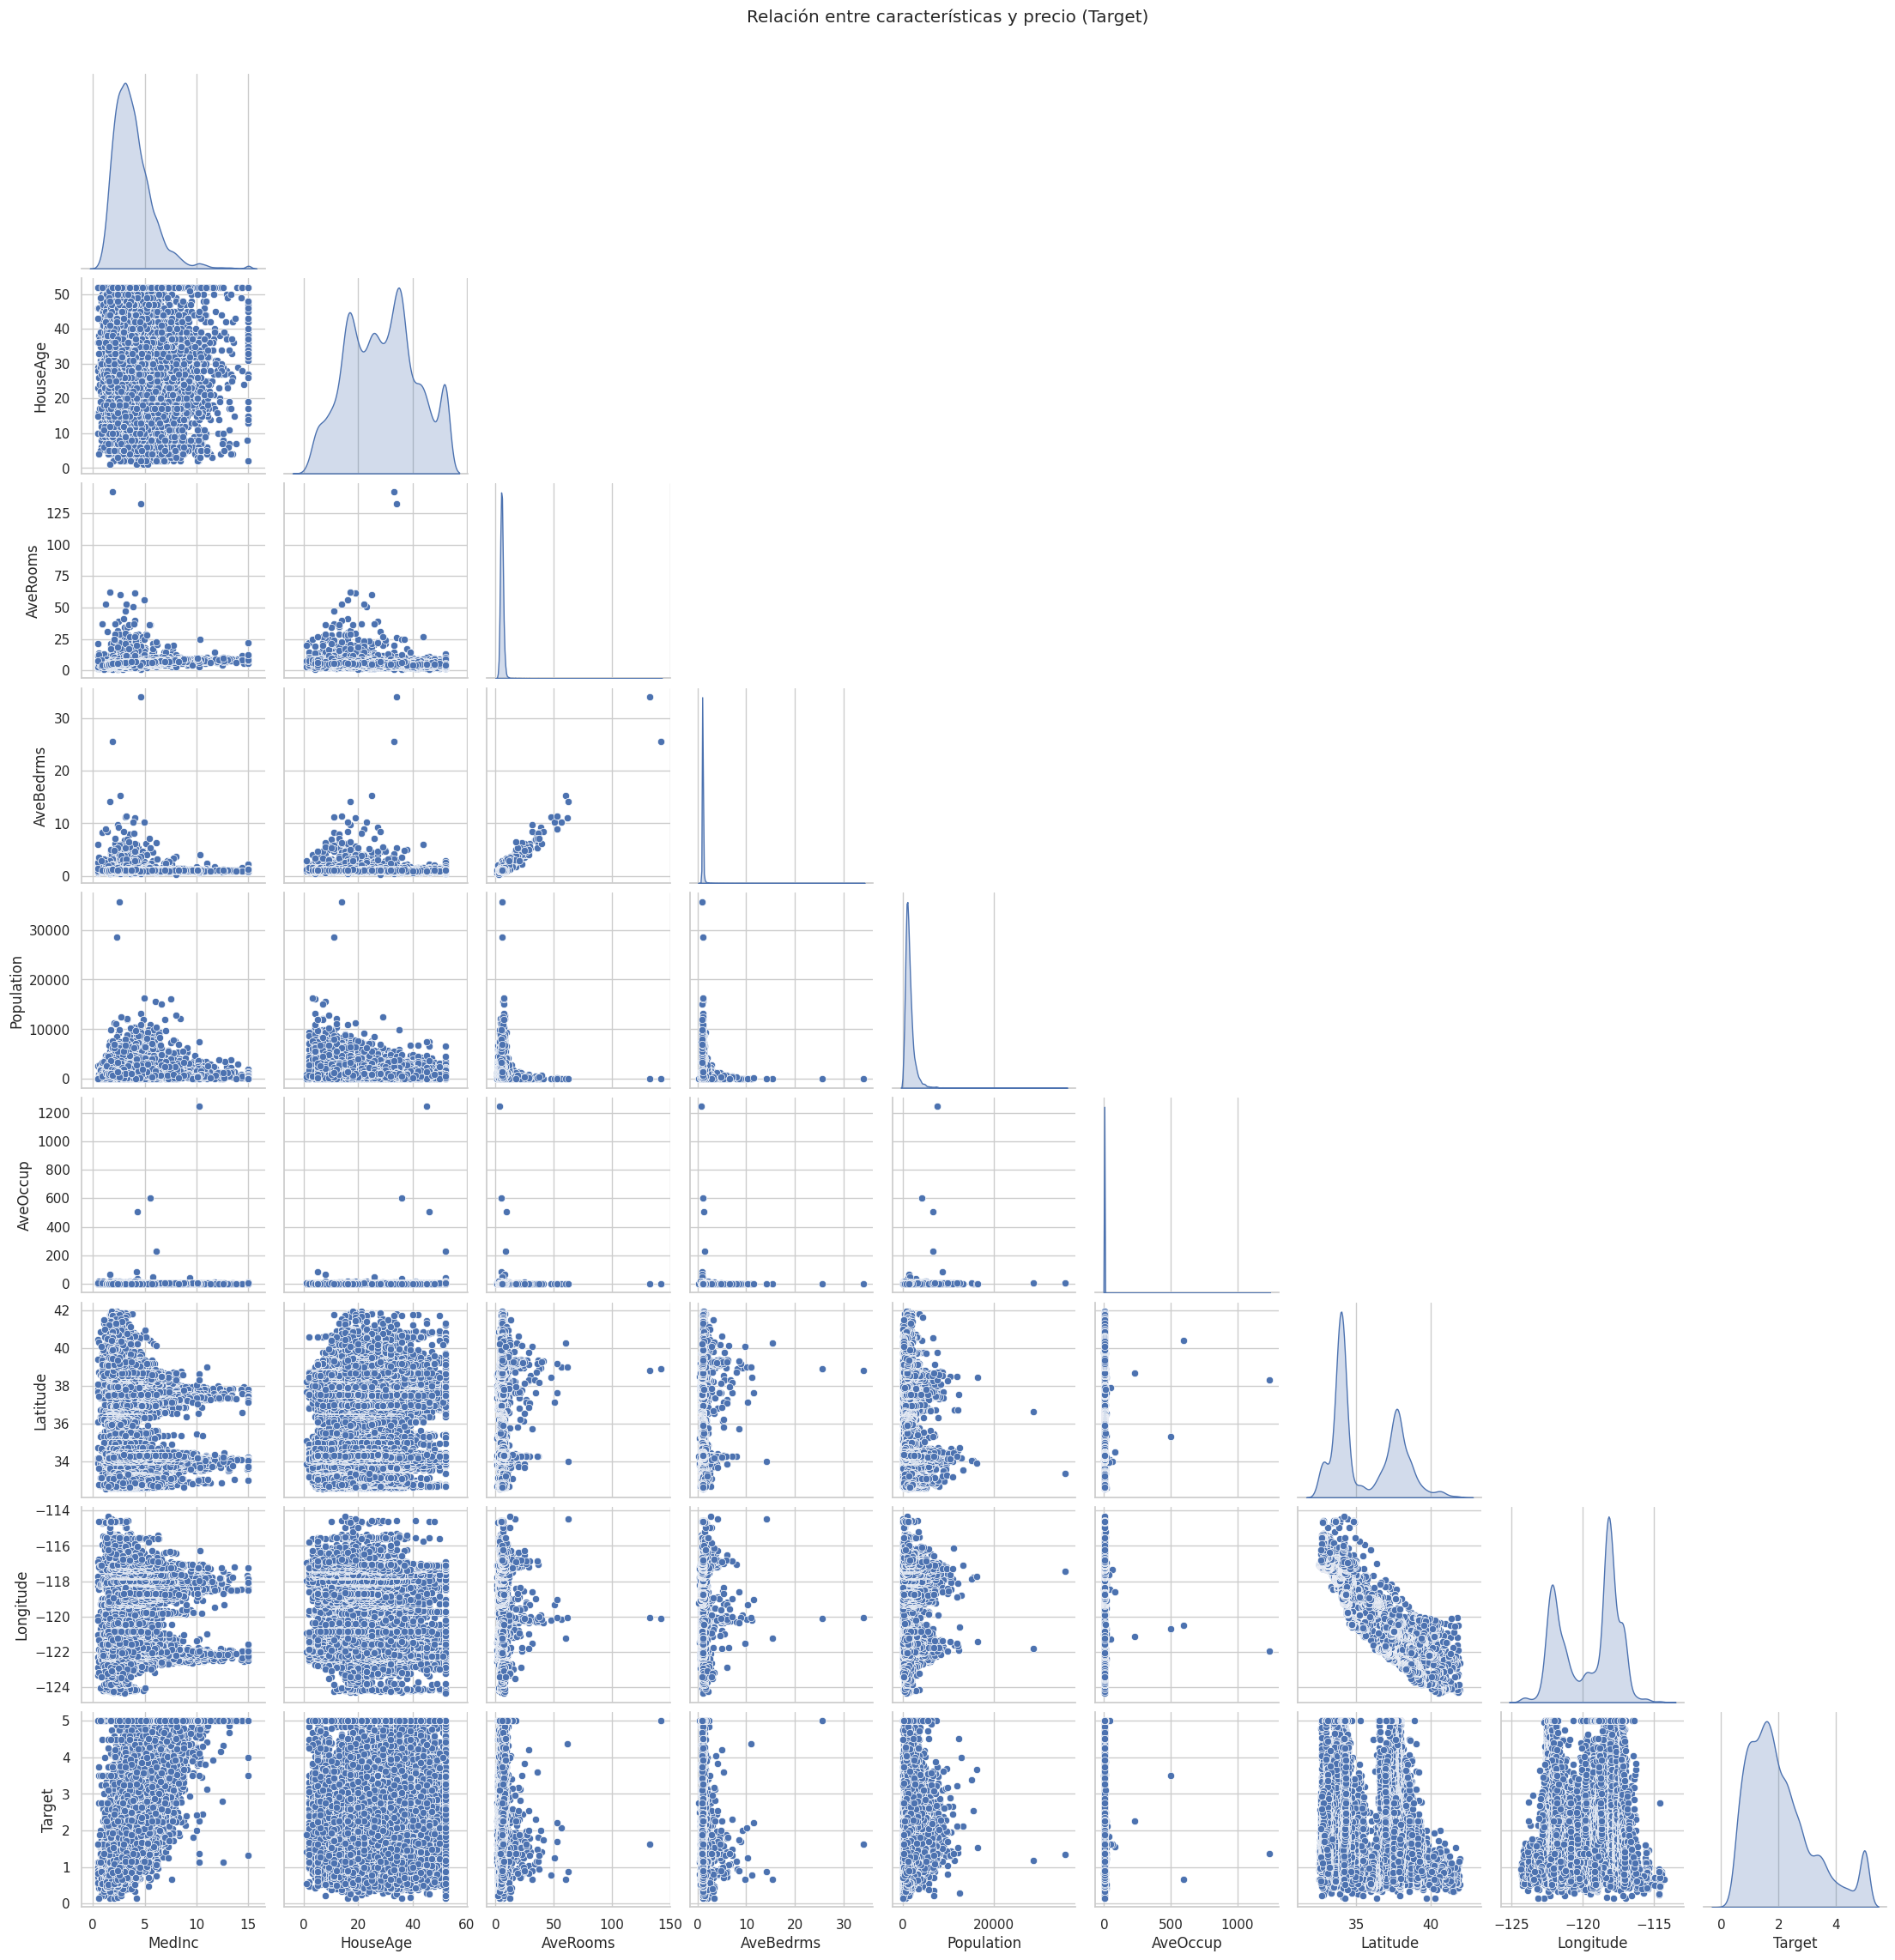

RMSE: 0.7455813830127761
R^2: 0.5757877060324511


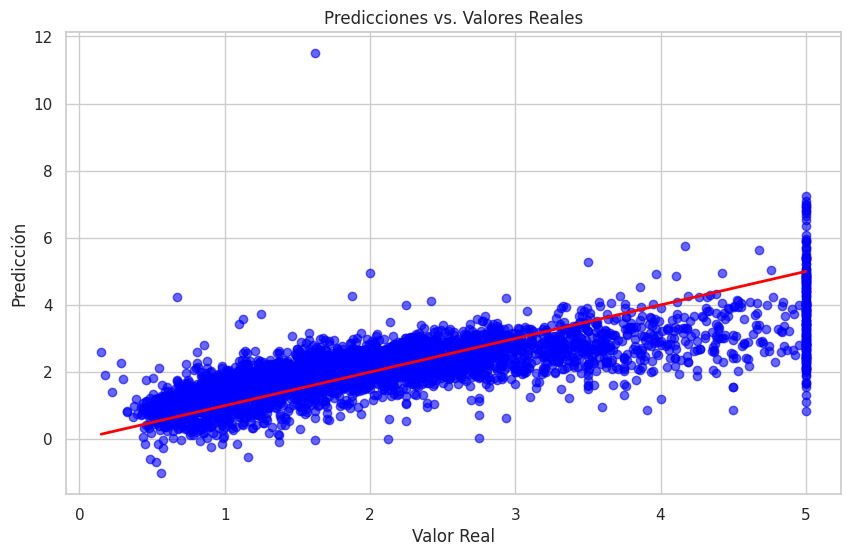

In [2]:
# Configuración del Entorno

# Descomenta estas líneas si necesitas instalar las bibliotecas.
# !pip install scikit-learn
# !pip install matplotlib pandas numpy seaborn

# Importar las bibliotecas comunes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics, preprocessing, linear_model

# Configurar estilos para gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el Conjunto de Datos
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='Target')

# Exploración de los Datos
# Visualizar la relación entre una característica y el precio objetivo
sns.pairplot(pd.concat([X, y], axis=1), diag_kind='kde', corner=True)
plt.suptitle("Relación entre características y precio (Target)", y=1.02)
plt.show()

# Preprocesamiento de Datos
# Normalizar las características para tener la misma escala
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del Conjunto de Datos
# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamiento del Modelo
# Entrenar un modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Evaluación del Modelo
# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

# Imprimir resultados de la evaluación
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Visualización de Resultados
# Gráfico Predicciones vs. Valores Reales
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Predicciones vs. Valores Reales")
plt.show()

